## DA 350 SP23 Lab 2 - Movie Recommendations
![Whits](https://d112y698adiu2z.cloudfront.net/photos/production/software_photos/002/033/904/datas/original.jpg)

#### This Lab is due Wednesday night, February 1.
Please use this .ipynb file as a starting point and write your code and fill in your answers directly in the notebook.  I will ask specific questions in <b> bolded font </b>.  For written answers, please create the cell as a Markdown type so the text displays neatly.  For code, comment sufficiently so I can understand your process.  Please try to delete unnecessary, old code so it is easy for me to evluate.  When you have finished, displayed all code outputs and written all answers, please save and submit to Canvas as a .html file.

## Background and Objective:
In this lab you will build a system for recommending movies to viewers. These so-called “Recommender Systems” are incredibly popular and used in applications such as presenting products to shoppers on Amazon, finding new music for listeners on Pandora and Spotify, suggesting pages and users on social media, and identifying potential romantic candidates on dating websites (appropriate for Valentine’s Day!). From 2006 to 2009, Netflix ran a competition to improve their recommendation system by 10%, and eventually gave a $1,000,000 prize to a team that used methods similar to what you will learn in this lab.

Our precise goal for this lab is to make decisions about whether to send a user an ad for a movie before they have seen it. We will make predictions about whether a user would watch the movie given the ad, then adapt the probability predictions into decisions. There are two primary approaches to implementing recommender system, both of which use a machine-learning algorithm called k-nearest neighbors.

The first approach is called content based, and the idea is to compare the movie we want a prediction of to similar movies the user has rated. For example, Danielle likes romantic comedies and dislikes action movies, so we could predict she will like a new romantic movie.

The second approach is called collaborative filtering, and the theory is to match the user to other similar users on the basis of their ratings. For example, Adam, Betty, and Carlos all like sci-fi action movies and dislike documentaries, so we could predict Adam’s review of a new movie using Betty and Carlos’s reviews of that movie.

In this lab, we will explore the second approach, predicting whether a user has seen (rated) a movie or not based on their similarity to similar users. This has the advantage of there being no missing data - by virtue of no rating being present, it tells us the user has not seen the movie.

We will use the movie ‘The Princess Bride’ for our ads. The movie has everything - adventure, comedy, romance, action, memorable quotes.

![PB](https://www.slantmagazine.com/wp-content/uploads/2018/11/princessbride.jpg)

(See anything cool about the movie title in the image? Try turning it upside down!)

The scenario is the following: you work for a video rental service where users pay \\$3 to digitally rent The Princess Bride (TPB) for 24 hours. After paying for internet bandwidth and the movie royalties, you stand to make \\$1 profit on each user that watches TPB. You have access to user’s viewing history, knowing exactly which movies they have seen. You can send an ad for \\$0.20 to specific users. You would like a strategy to target specific users who have not yet watched TPB to maximize your profit.

## Data:
The data we will use comes from MovieLens, a movie recommendation service. It contains 20,000,263 movie ratings from 138,493 users across 27,278 movies from 2015 and earlier.

"movies.csv" contains a subset of 1,319 of the more popularly watched movies to reduce the size of the data and make the analyses more computationally tractable.

"train_movies.csv" and "test_movies.csv" are two data sets I cleaned for you, including randomly sampling only 10,000 users. Both data sets are in a wide format - each row is a user, each column is a movie, and entries are ratings. Movies that have not been rated have a null value. I have also prefaced the movieIds with ‘mId’ to avoid problems with naming columns starting with numbers.

As in practice, you will use the training data to train the model, make modeling decisions, and estimate future performance. Then, you will use the test data to evaluate how well your model works in practice.

In [ ]:
#Import packages
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics

<b>1) First read in the training and test set movie ratings data as pandas data frames with the UserId as the index column.  Convert the ratings of both the training and test sets into binary data - 0 if the user has not rated that movie, 1 if they have rated it.</b>

In [ ]:
train_movie = pd.read_csv('train_movies.csv')
test_movie = pd.read_csv('test_movies.csv')

In [ ]:
#Write your code/answer to 1) in this cell
def clear_data(movies):
    df = movies.fillna(0)
    df = movies.applymap(lambda x: 1 if x == 1 else 0 if x != x else 1)
    df = df.drop('userId', axis=1)
    return pd.DataFrame(df)

train_mov = clear_data(train_movie)
test_mov = clear_data(test_movie)

<b> 2) Pick a subset of movies (at least 10) to use as predictions that the user has watched The Princess Bride.  Ideally these should be movies you think would make good predictors - similar traits, similar genres, similar years, etc.  You can look at the "movies.csv" file (I suggest in Excel or Google sheets and not Python) to see the available options.  Use the Scikit learn package to build a k-nearest neighbors classification model on the training data to predict whether a user has watched The Princess Bride (1) or not (0) based on their similarity to other users. </b>

The general syntax of using k-nearest neighbors classifier is to first initialize a model with "KNeighborsClassifier()" then fit it to training data with "your_model.fit(predictors, response)".  https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php provides a simple example.   Be sure not to use userId as a predictor variable!


In [ ]:
#Write your code/answer to 2) in this cell
import random
mov = pd.read_csv('movies.csv')
def split_genre(genre):
    genres = str(genre)
    return genres.split("|")

def find_princess_bride_genre():
    for i in range(len(mov['title'])):
        if mov['title'][i] == 'Princess Bride, The (1987)':
            return split_genre(mov['genres'][i])

def find_the_nearest_genre():
    df = []
    genres = find_princess_bride_genre()
    for i in range(0, len(genres)):
        for j in range(0, 1319):
            if genres[i] in mov['genres'][j]:
                df.append(mov['title'][j])
    return df

def random_chosen():
    df = []
    temp = find_the_nearest_genre()
    for i in range(0, 10):
        random_number = random.randint(0, len(temp)-1)
        df.append(temp[random_number])
    return df

def output_movId():
    df = random_chosen()
    dfs = []
    for i in range(0, len(df)):
        for j in range(0, 1319):
            if df[i] in mov['title'][j]:
                dfs.append(mov['movieId'][j])
    return dfs

lst = output_movId()
for i in range(0,len(lst)):
    if lst[i] == 4 or lst[i] == 8:
        del lst[i]
mlist = ['mId' + str(x) for x in lst]

train_data = train_mov.loc[:, mlist]
train_labels = train_mov.loc[:, 'mId1197']
test_data = test_mov.loc[:, mlist]
test_labels = test_mov.loc[:, 'mId1197']

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 

predicted = knn.predict(train_data)
print("Predictions from the classifier:")
print(predicted)
print("Target values:")
print(train_labels)

Predictions from the classifier:
[0 0 0 ... 0 0 0]
Target values:
0       1
1       1
2       0
3       0
4       0
       ..
6995    0
6996    0
6997    0
6998    1
6999    1
Name: mId1197, Length: 7000, dtype: int64


<b> 3) Use ‘your_model.predict(training_data)’ to generate the 0/1 class predictions on the training set using the default delta value of 0.5. Look at the confusion matrix (table of predictions vs. true values) with the code from class. Report and explain the meaning of the accuracy, precision, and recall measures. How good is the performance of this model in the context of what you are trying to achieve? </b>


[0 0 0 ... 0 0 0]
Accuracy: 0.7844285714285715


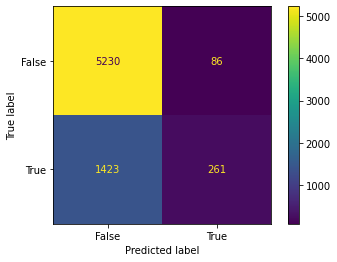

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      5316
           1       0.75      0.15      0.26      1684

    accuracy                           0.78      7000
   macro avg       0.77      0.57      0.57      7000
weighted avg       0.78      0.78      0.73      7000



In [ ]:
#Answer to 3)
import sklearn.metrics
class_predictions = knn.predict(train_data)
print(class_predictions)
print("Accuracy:", sklearn.metrics.accuracy_score(train_labels, class_predictions))
confusion_matrix = sklearn.metrics.confusion_matrix(train_labels, class_predictions)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(sklearn.metrics.classification_report(train_labels, class_predictions))

<b> 4) Adapt the code from class to extract the probabilities that each user in the training data will watch TPB. For the range of possible delta thresholds, make a table of TP, FP, TN, and FN on the training data if we use each cutoff.  Use the financial costs in the introduction to evaluate the total cost (or profit) of each cutoff decision.</b> 

<b> From this table and the context in the introduction, what decisions should you make? In other words, what probability cutoff value is the best decision to send users ads? </b> 

[[1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 ...
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]]


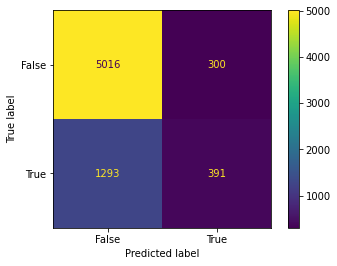

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      5316
           1       0.57      0.23      0.33      1684

    accuracy                           0.77      7000
   macro avg       0.68      0.59      0.60      7000
weighted avg       0.74      0.77      0.73      7000



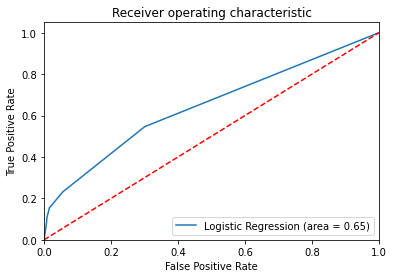

In [ ]:
#Answer to 4)
#Generate probability predictions
prob_predictions = knn.predict_proba(train_data)
print(prob_predictions)
delta = 0.3
class_predictions = []
for i in range(len(prob_predictions)):
    if prob_predictions[i,1] >= delta:
        class_predictions.append(1)
    else:
        class_predictions.append(0)
confusion_matrix = sklearn.metrics.confusion_matrix(train_labels, class_predictions)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(sklearn.metrics.classification_report(train_labels, class_predictions))
fpr, tpr, thresholds = sklearn.metrics.roc_curve(train_labels, prob_predictions[:,1])
logit_roc_auc = sklearn.metrics.roc_auc_score(train_labels, prob_predictions[:,1])
fpr, tpr, thresholds = sklearn.metrics.roc_curve(train_labels, prob_predictions[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

perf = []

for delta in thresholds:
    TP = np.sum(np.logical_and(prob_predictions[:,1] >= delta, train_labels == 1))
    FP = np.sum(np.logical_and(prob_predictions[:,1] >= delta, train_labels == 0))
    TN = np.sum(np.logical_and(prob_predictions[:,1] < delta, train_labels == 0))
    FN = np.sum(np.logical_and(prob_predictions[:,1] < delta, train_labels == 1))
    perf.append([delta, TP, FP, TN, FN])
    
perf_table = pd.DataFrame(perf, columns = ['Delta', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'])

In [ ]:
perf_table['Profit'] = 0.8*perf_table['True Positives'] - 0.2*perf_table['False Positives']
perf_table

,Delta,True Positives,False Positives,True Negatives,False Negatives,Profit
0,2.0,0,0,5316,1684,0.0
1,1.0,136,38,5278,1548,101.2
2,0.8,184,46,5270,1500,138.0
3,0.6,261,86,5230,1423,191.6
4,0.4,391,300,5016,1293,252.8
5,0.2,920,1598,3718,764,416.4
6,0.0,1684,5316,0,0,284.0


Text(0, 0.5, 'Profit')

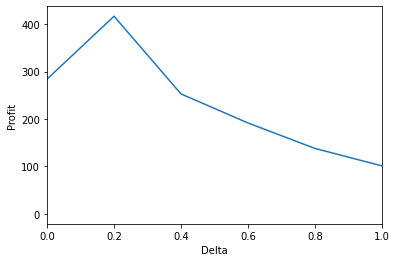

In [ ]:
plt.plot(perf_table['Delta'], perf_table['Profit'])
plt.xlim(0, 1)
plt.xlabel("Delta")
plt.ylabel("Profit")

With advanced prediction methods, there are often user-input parameters that need to be tweaked to produce better predictions.  The critical parameter in k-nearest neighbors is k, which describes how many of the most similar points to consider in making the prediction.  The simplest way to find the best k is to try lots of values and see which gives the most profit.  Often there is a clear best value, with profits decreasing for higher or lower k.  The bottom of the python-course hyperlink above gives an efficient way to code this.

<b> 5) Adapt your prediction model and step 4 to find the k that produces the best profit.  What k do you find is best, and what profit do you make? </b> 

In [ ]:
#Answer to 5)
best = perf_table.iloc[[perf_table['Profit'].idxmax()]]
best

,Delta,True Positives,False Positives,True Negatives,False Negatives,Profit
5,0.2,920,1598,3718,764,416.4


Max profit: 416.80000000000007 k= 15 delta= 0.2


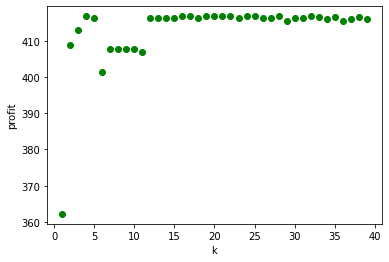

In [ ]:
X, Y = [], []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k, 
                                      p=2,    # Euclidian
                                      metric="minkowski")
    knn.fit(train_data, train_labels)
    prediction = knn.predict_proba(train_data)
    delta = float(best['Delta'])
    perf = []
    TP = np.sum(np.logical_and(prediction[:,1] >= delta, train_labels == 1))
    FP = np.sum(np.logical_and(prediction[:,1] >= delta, train_labels == 0))
    TN = np.sum(np.logical_and(prediction[:,1] < delta, train_labels == 0))
    FN = np.sum(np.logical_and(prediction[:,1] < delta, train_labels == 1))
    perf.append([delta, TP, FP, TN, FN])
    perf_table = pd.DataFrame(perf, columns = ['Delta', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'])
    perf_table['Profit'] = 0.8*perf_table['True Positives'] - 0.2*perf_table['False Positives']
    profit = perf_table.iloc[[perf_table['Profit'].idxmax()]]
    X.append(k)
    Y.append(profit['Profit'])
temp1 = 0
temp2 = 0
for i in range(39):
    if float(Y[i]) > temp1:
        temp1 = float(Y[i])
        temp2 = i
fig, ax = plt.subplots()
ax.set_xlabel('k')
ax.set_ylabel('profit')
ax.plot(X, Y, "go")
print('Max profit:', temp1, 'k=' ,temp2, 'delta=', float(best['Delta']))

Suppose you implement your best solution from 5). A week goes by, and during that week you observe all the users in the test_movies data (making decisions to send each user an ad or not based on your solution). In other words, envision that for every user in the test data, you have observed their movie rating history for every movie except TPB. You make decisions about whether or not to send ads to each user, and one week later those with a TPB rating have responded positively to your ad and rented the movie, while those without a TPB rating have not rented it.

<b> 6) Finally it’s time to translate your findings into results a CEO would want to see. If we apply your method to all users who have not seen TPB for the next year,
    
<b>a) How many users will rent the movie using your decisions?
    
<b>b) What profit would we expect to make? (Be sure to consider both the revenue from rentals and money spent on advertising.) How would this compare to a baseline where we sent ads to every user?
    
<b>c) How much money would be wasted on advertisements that don’t encourage a user to rent the movie?
    
<b>d) How many users do we potentially miss that would have rented if we had advertised to them? </b>

Think carefully about how we can use the data from the test set and your answer to 5) to evaluate this.  Be careful of the time units described. A moderate portion of your grade on this lab will depend on how well you can answer this question and how well you can evaluate how much profit you can reasonably generate from your decisions.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=int(temp1), 
                                      p=2,    # Euclidian
                                      metric="minkowski")
knn.fit(train_data, train_labels)
prob_predictions = knn.predict_proba(test_data)
delta = float(best['Delta'])
perf = []
TP = np.sum(np.logical_and(prob_predictions[:,1] >= delta, test_labels == 1))
FP = np.sum(np.logical_and(prob_predictions[:,1] >= delta, test_labels == 0))
TN = np.sum(np.logical_and(prob_predictions[:,1] < delta, test_labels == 0))
FN = np.sum(np.logical_and(prob_predictions[:,1] < delta, test_labels == 1))
perf.append([delta, TP, FP, TN, FN])
perf_table = pd.DataFrame(perf, columns = ['Delta', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'])
perf_table['Profit'] = 0.8*perf_table['True Positives'] - 0.2*perf_table['False Positives']
bests = perf_table.iloc[[perf_table['Profit'].idxmax()]]
bests

,Delta,True Positives,False Positives,True Negatives,False Negatives,Profit
0,0.2,355,727,1572,327,138.6


In [ ]:
knn = KNeighborsClassifier(n_neighbors=int(temp1), 
                                      p=2,    # Euclidian
                                      metric="minkowski")
knn.fit(train_data, train_labels)
prob_predictions = knn.predict_proba(test_data)
delta = 0
perf = []
TP = np.sum(np.logical_and(prob_predictions[:,1] >= delta, test_labels == 1))
FP = np.sum(np.logical_and(prob_predictions[:,1] >= delta, test_labels == 0))
TN = np.sum(np.logical_and(prob_predictions[:,1] < delta, test_labels == 0))
FN = np.sum(np.logical_and(prob_predictions[:,1] < delta, test_labels == 1))
perf.append([delta, TP, FP, TN, FN])
perf_table = pd.DataFrame(perf, columns = ['Delta', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'])
perf_table['Profit'] = 0.8*perf_table['True Positives'] - 0.2*perf_table['False Positives']
bests = perf_table.iloc[[perf_table['Profit'].idxmax()]]
bests

,Delta,True Positives,False Positives,True Negatives,False Negatives,Profit
0,0,682,2299,0,0,85.8


In [ ]:
#a) How many users will rent the movie using your decisions?
print(int(bests['False Negatives'] + bests['True Positives']))

682


In [1]:
#b) What profit would we expect to make? (Be sure to consider both the revenue 
#from rentals and money spent on advertising.) How would this compare to a baseline where we sent ads to every user?
138.6-85.8

52.8

In [ ]:
#c) How much money would be wasted on advertisements that don’t encourage a user to rent the movie?
0.2 * 727

145.4

In [ ]:
#d) How many users do we potentially miss that would have rented if we had advertised to them?


The person would have rented if we had advertised to them is FN (False Negative), which is 1572 persons

Your Answer to 6)